In [ ]:
import os
import sys
from tqdm import tqdm
from time import time
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_data(title,auroc1,auprc1,auroc2,auprc2):
    # x轴
    # x轴标签
    x_labels = ["D=2048", "D=1024", "D=512", "D=256"]
    # 绘制折线图
    plt.figure(figsize=(6, 4))
    plt.ylim(0.8, 1.0)
    # plt.plot(x_labels, acc, marker='o', label='Accuracy')
    plt.plot(x_labels, auroc1, marker='s', label='AUROC1')
    plt.plot(x_labels, auprc1, marker='^', label='AUPRC1')
    plt.plot(x_labels, auroc2, marker='x', label='AUROC2')
    plt.plot(x_labels, auprc2, marker='d', label='AUPRC2')

    # 图例、标题和轴标签
    plt.title(title, fontsize=14)
    plt.xlabel('Dimension', fontsize=12)
    plt.ylabel('Metrics Value', fontsize=12)
    plt.legend()
    # plt.grid(alpha=0.5)
    plt.xticks(x_labels)
    plt.tight_layout()

    # 显示图表
    plt.show()

In [ ]:
#cifar10 vs svhn
# acc = [0.9480,0.9504,0.9520,0.9540,]
auroc1 = [0.9480,0.9303,0.9343,0.9418]
auprc1 = [0.9613,0.9528,0.9454,0.9596,]
auroc2 = [0.9735,0.9777,0.9786,0.9763,]
auprc2 = [0.9769,0.9822,0.9828,0.9819]
plot_data('cifar10 vs svhn:Metrics Over Feature Dimension',auroc1,auprc1,auroc2,auprc2)

In [ ]:
#cifar10 vs lsun 
# acc = [0.9365,0.9504,0.9520,0.9540,]
auroc1 = [0.9480,0.9325,0.9334,0.9307]
auprc1 = [0.9497,0.9515,0.9501,0.9470,]
auroc2 = [0.9671,0.9544,0.9535,0.9231,]
auprc2 = [0.9716,0.9647,0.9632,0.9629]
plot_data('cifar10 vs lsun:Metrics Over Feature Dimension',auroc1,auprc1,auroc2,auprc2)

In [ ]:
#cifar10 vs cifar100 
# acc = [0.9365,0.9504,0.9520,0.9540,]
auroc1 = [0.9068,0.9085,0.9081,0.9307]
auprc1 = [0.9257,0.9279,0.9231,0.9470,]
auroc2 = [0.9171,0.9203,0.9098,0.9231,]
auprc2 = [0.9312,0.9343,0.9201,0.9629]
plot_data('cifar10 vs lsun:Metrics Over Feature Dimension',auroc1,auprc1,auroc2,auprc2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 数据提取自表格
datasets = ['cifar100', 'lsun', 'mnist', 'svhn']

methods = ['Softmax', 'Ensemble', 'DDU', 'DDU+ip']
markers = ['o', 's', '^', 'D']  # 圆圈、方块、三角形、菱形
auroc_values = {
    'Softmax': [0.8786, 0.8952, 0.9434, 0.9271],
    'Ensemble': [0.9244, 0.9724, 0.9735, 0.9667],
    'DDU': [0.9068, 0.9365, 0.9774, 0.9480],
    'DDU+ip': [0.9171, 0.9671, 0.9939, 0.9735],
}
auprc_values = {
    'Softmax': [0.8774, 0.8997, 0.9524, 0.9405],
    'Ensemble': [0.9166, 0.9685, 0.9706, 0.9599],
    'DDU': [0.9257, 0.9497, 0.9845, 0.9613],
    'DDU+ip': [0.9312, 0.9716, 0.9957, 0.9769],
}

# 绘制 AUROC 折线图
plt.figure(figsize=(10, 5))
for method, marker in zip(methods, markers):
    plt.plot(datasets, auroc_values[method], marker=marker, label=method)

plt.title("AUROC for Different Methods")
plt.xlabel("Datasets")
plt.ylabel("AUROC")
plt.ylim(0.85, 1.0)
plt.grid(True)
plt.legend()
plt.show()

# 绘制 AUPRC 折线图
plt.figure(figsize=(10, 5))
for method, marker in zip(methods, markers):
    plt.plot(datasets, auprc_values[method], marker=marker, label=method)

plt.title("AUPRC for Different Methods")
plt.xlabel("Datasets")
plt.ylabel("AUPRC")
plt.ylim(0.85, 1.0)
plt.grid(True)
plt.legend()
plt.show()


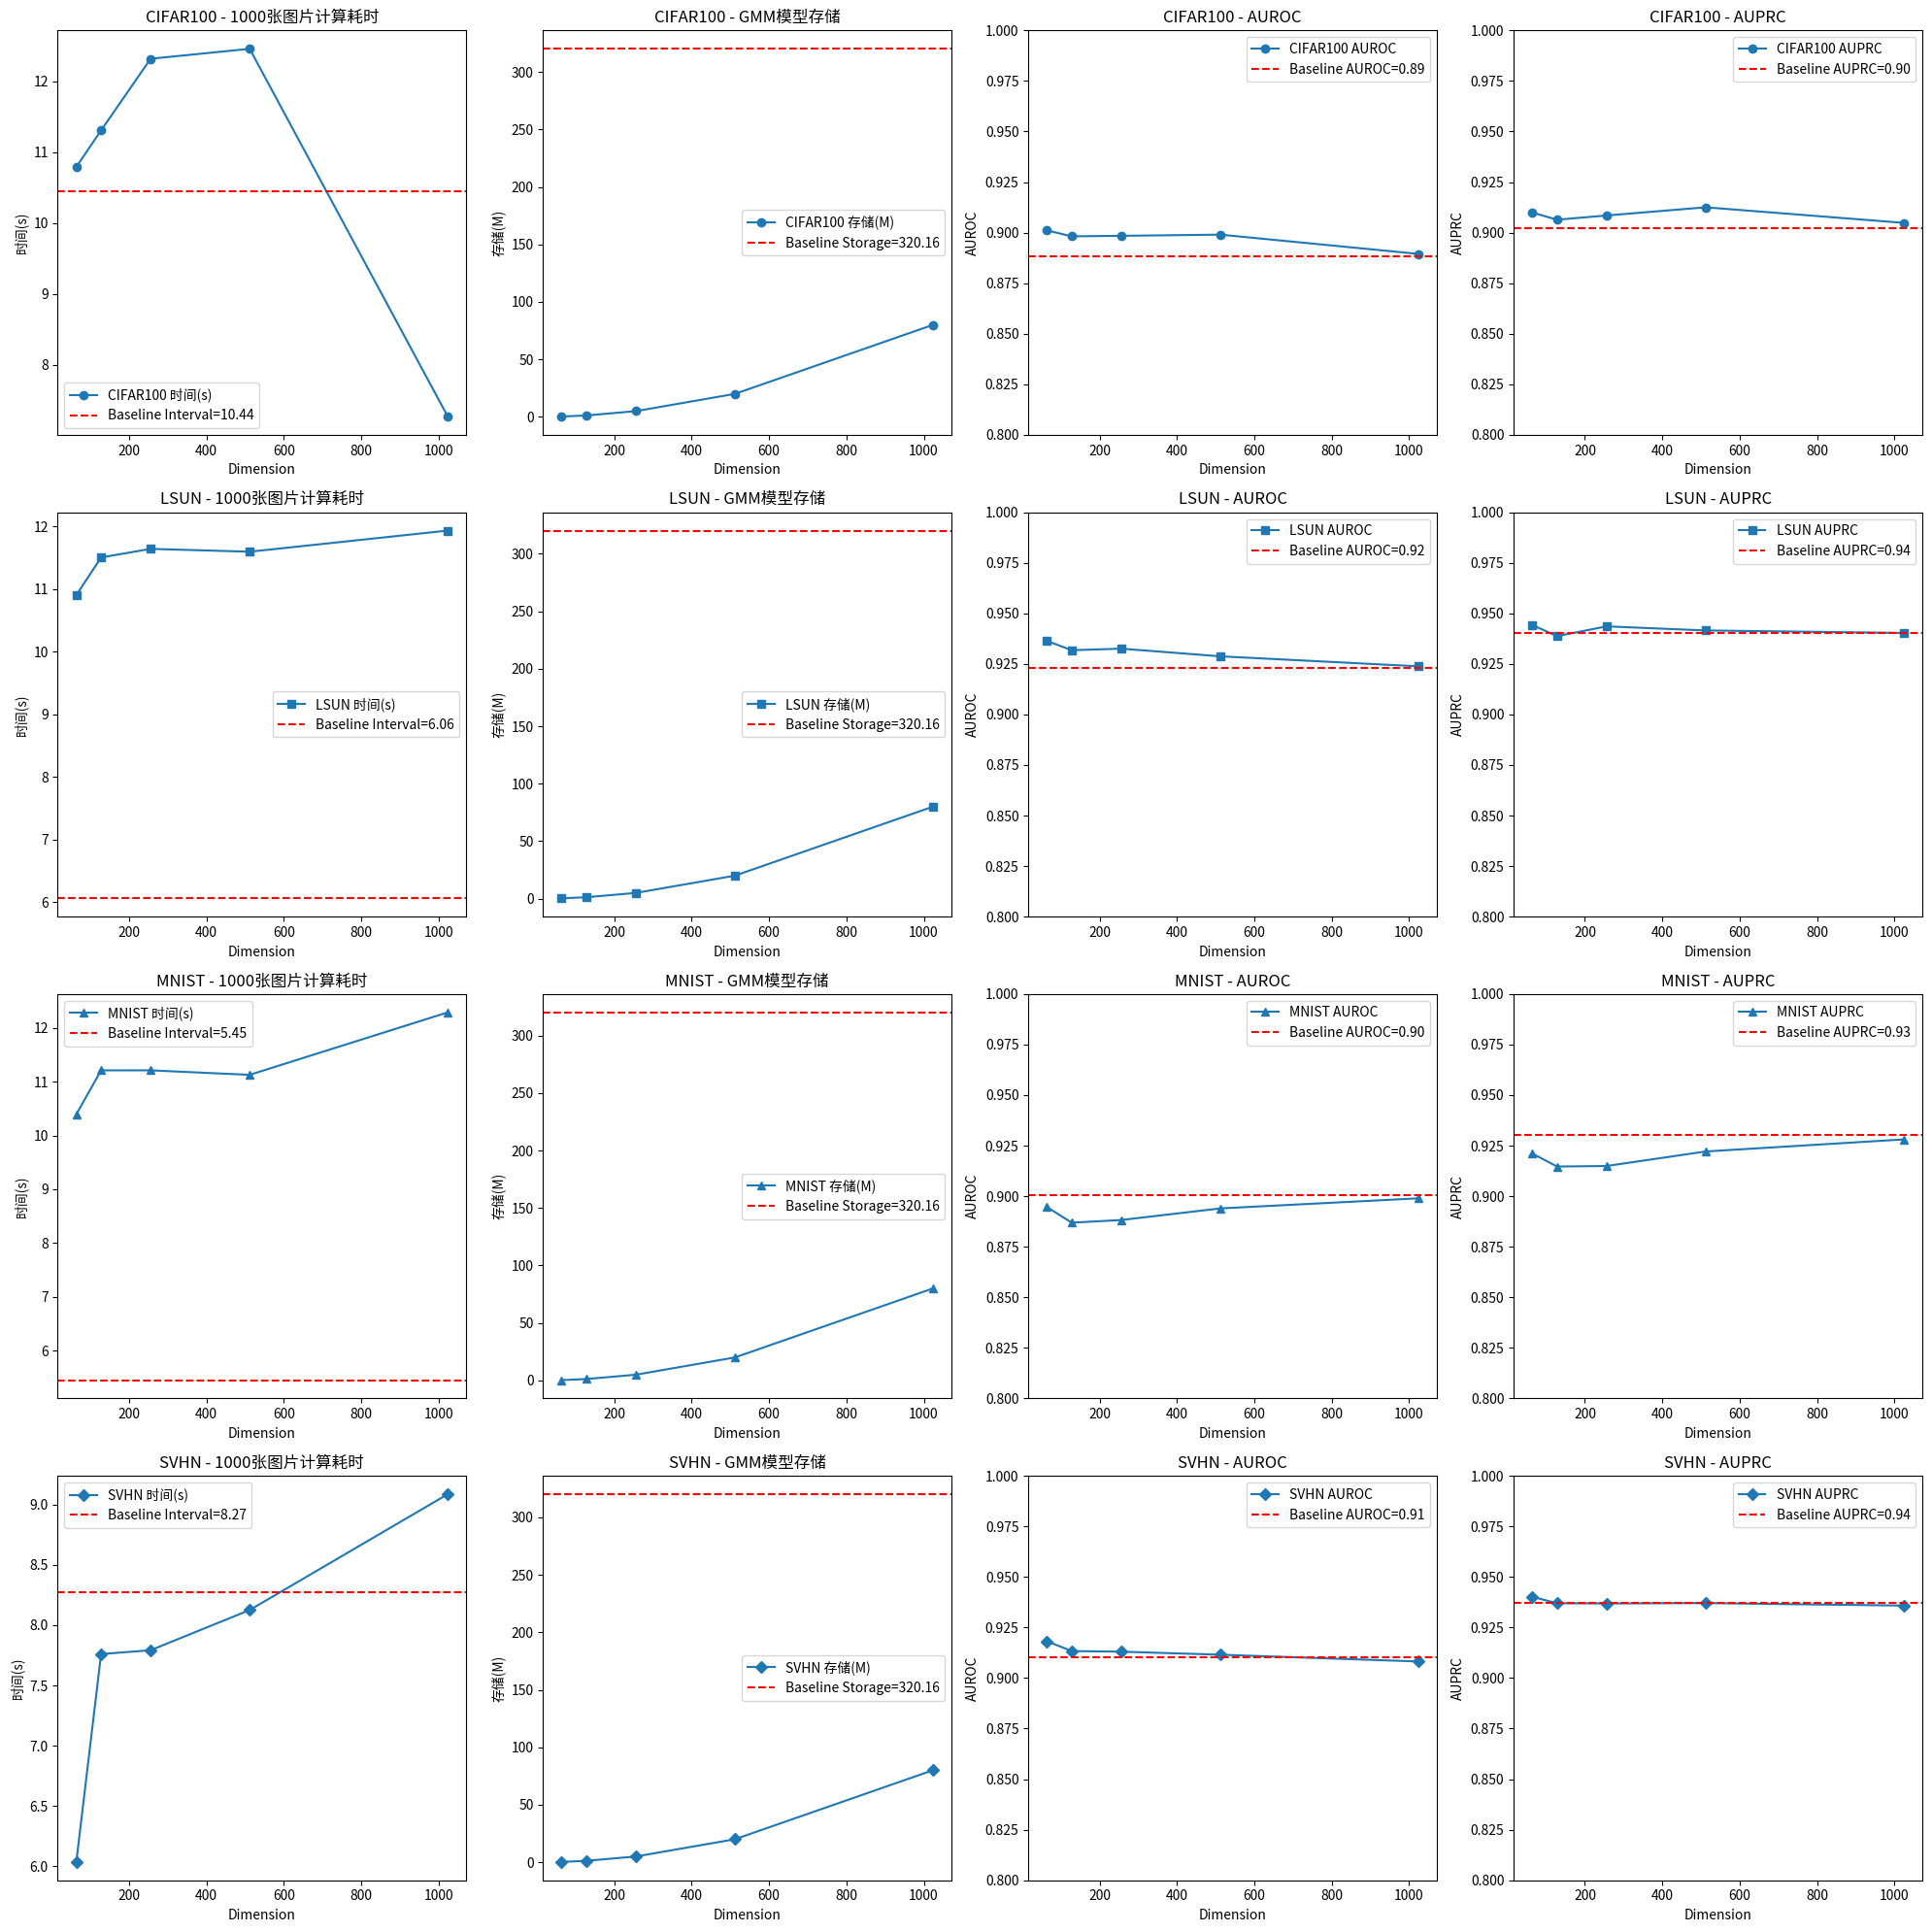

In [5]:
import json
from matplotlib import rcParams,font_manager
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

run = 38
model = "resnet50"


font_path = './fonts/NotoSansCJK-Regular.ttc'
font_prop = font_manager.FontProperties(fname=font_path)

matplotlib.rcParams['font.family'] = font_prop.get_name()
matplotlib.rcParams['axes.unicode_minus'] = False  # 防止负号显示问题


fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()  # 将多维数组展平成一维，方便迭代

datasets = ["cifar100", "lsun", "mnist", "svhn"]
plot_titles = ["1000张图片计算耗时", "GMM模型存储", "AUROC", "AUPRC"]
dataset_markers = {
    "cifar100": "o",
    "lsun": "s",
    "mnist": "^",
    "svhn": "D"
}
for i, dataset in enumerate(datasets):
    path = f"../results/run{run}/res_{model}_sn_3.0_mod_seed_1_gmm_cifar10_{dataset}_pca_dimension.json"

    with open(path, 'r') as file:
        data = json.load(file)

        # 初始化存储均值的字典
        mean_results = {
            'dimension': [],
            'interval': [],
            'size': [],
            'auroc': [],
            'auprc': []
        }

        # 遍历文件数据并计算均值
        for file, pca_res in data.items():
            mean_results['dimension'].append(pca_res['dimension'])
            mean_results['interval'].append(pca_res['interval'])
            mean_results['size'].append([x/(1024*1024) for x in pca_res['size']])#单位转为M
            mean_results['auroc'].append(pca_res['auroc'])
            mean_results['auprc'].append(pca_res['auprc'])

        # 计算各字段的均值
        avg_dimension = np.mean(mean_results['dimension'], axis=0)
        avg_interval = np.mean(mean_results['interval'], axis=0)
        avg_size = np.mean(mean_results['size'], axis=0)
        avg_auroc = np.mean(mean_results['auroc'], axis=0)
        avg_auprc = np.mean(mean_results['auprc'], axis=0)

        # 基线值
        ori_interval = np.mean([pca_res['ori_interval'] for _, pca_res in data.items()])
        ori_storage = np.mean([pca_res['ori_size'] for _, pca_res in data.items()])/(1024*1024)
        m1_auroc = np.mean([pca_res['ori_auroc'] for _, pca_res in data.items()])
        m1_auprc = np.mean([pca_res['ori_auprc'] for _, pca_res in data.items()])

        # 绘制子图
        for j, (y_data, y_label, baseline, baseline_label) in enumerate(zip(
            [avg_interval, avg_size, avg_auroc, avg_auprc],
            ["时间(s)", "存储(M)", "AUROC", "AUPRC"],
            [ori_interval, ori_storage, m1_auroc, m1_auprc],
            ["Baseline Interval", "Baseline Storage", "Baseline AUROC", "Baseline AUPRC"]
        )):
            ax = axes[i * 4 + j]
            ax.plot(avg_dimension, y_data, marker=dataset_markers[dataset], label=f'{dataset.upper()} {y_label}')
            ax.axhline(baseline, color='red', linestyle='--', label=f'{baseline_label}={baseline:.2f}')
            ax.set_title(f'{dataset.upper()} - {plot_titles[j]}')
            ax.set_xlabel('Dimension')
            ax.set_ylabel(y_label)
            ax.legend()

            # 对 AUROC 和 AUPRC 设置纵轴范围 [0, 1]
            if y_label in ["AUROC", "AUPRC"]:
                ax.set_ylim(0.8, 1)

# 保存每个数据集的图片
plt.tight_layout()
plt.savefig(f"pngs/{model}/pca_plots_dimension.png", bbox_inches='tight')
plt.show()


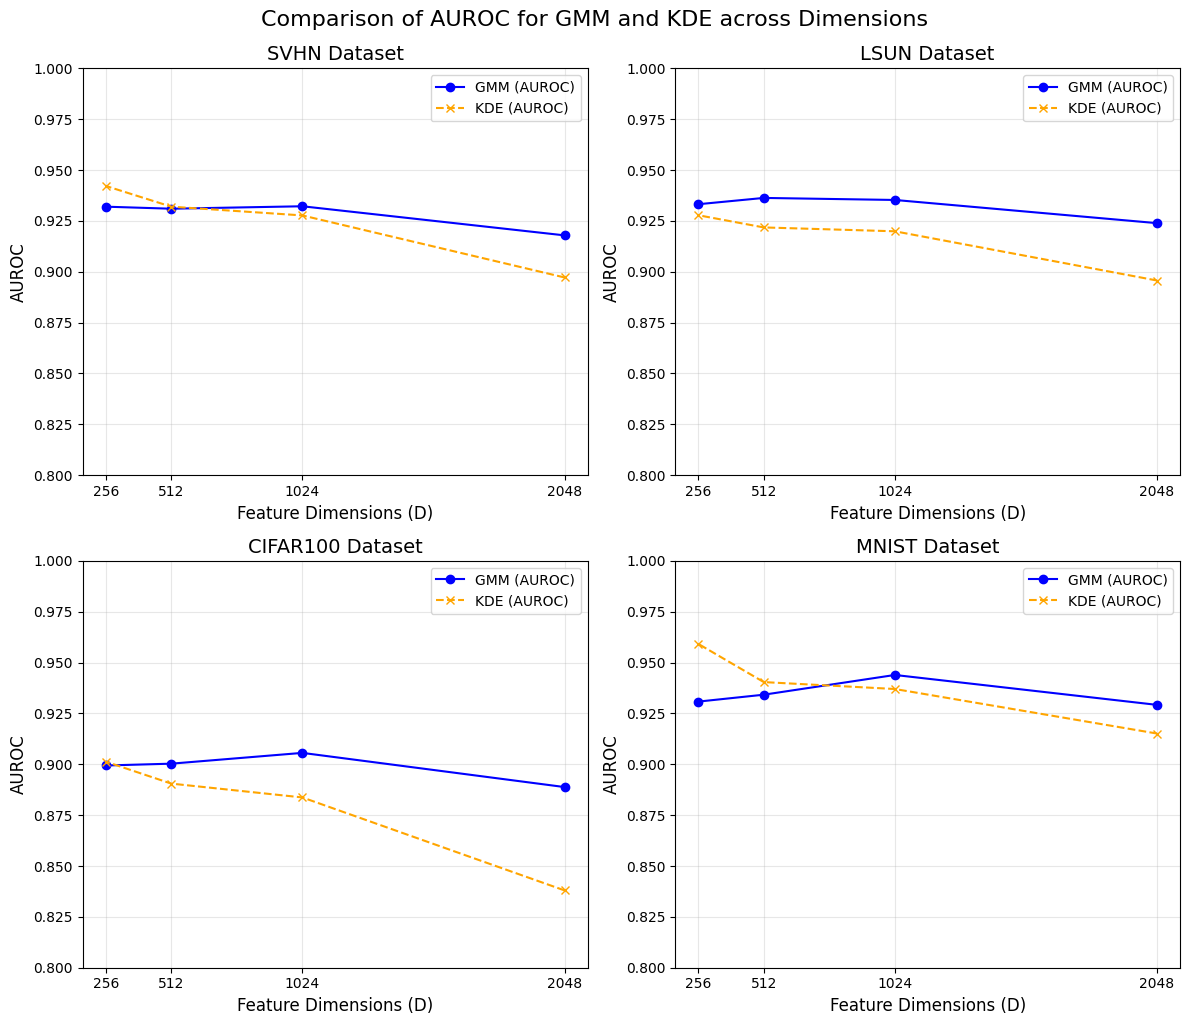

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
dimensions = [2048, 1024, 512, 256]
ood_datasets = ["SVHN", "LSUN", "CIFAR100", "MNIST"]
gmm_auroc = {
    "SVHN": [0.9179, 0.9322, 0.9310, 0.9320],
    "LSUN": [0.9239, 0.9353, 0.9363, 0.9332],
    "CIFAR100": [0.8888, 0.9056, 0.9003, 0.8994],
    "MNIST": [0.9292, 0.9439, 0.9342, 0.9308],
}
kde_auroc = {
    "SVHN": [0.8972, 0.9277, 0.9320, 0.9422],
    "LSUN": [0.8957, 0.9199, 0.9218, 0.9278],
    "CIFAR100": [0.8380, 0.8837, 0.8905, 0.9013],
    "MNIST": [0.9151, 0.9370, 0.9404, 0.9592],
}

# 设置画布
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

# 绘制每个子图
for i, dataset in enumerate(ood_datasets):
    ax = axs[i]
    ax.plot(
        dimensions, 
        gmm_auroc[dataset], 
        marker="o", 
        label=f"GMM (AUROC)", 
        color="blue"
    )
    ax.plot(
        dimensions, 
        kde_auroc[dataset], 
        marker="x", 
        linestyle="--", 
        label=f"KDE (AUROC)", 
        color="orange"
    )
    ax.set_title(f"{dataset} Dataset", fontsize=14)
    ax.set_xlabel("Feature Dimensions (D)", fontsize=12)
    ax.set_ylabel("AUROC", fontsize=12)
    ax.set_xticks(dimensions)
    ax.set_ylim(0.8, 1.0)
    ax.legend()
    ax.grid(alpha=0.3)

# 调整布局
plt.tight_layout()
plt.suptitle("Comparison of AUROC for GMM and KDE across Dimensions", fontsize=16, y=1.02)
plt.show()


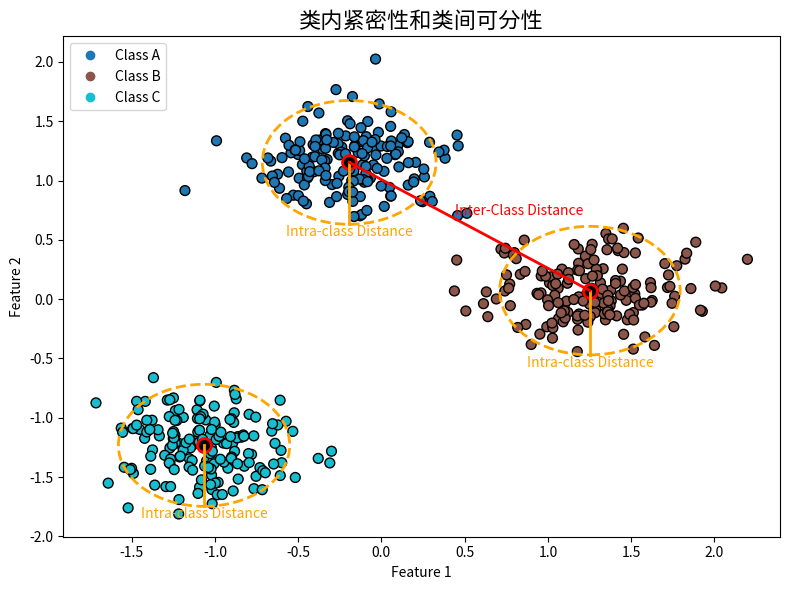

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

import matplotlib
from matplotlib import font_manager

font_path = './fonts/NotoSansCJK-Regular.ttc'  # 你的字体路径
font_prop = font_manager.FontProperties(fname=font_path)

matplotlib.rcParams['font.family'] = font_prop.get_name()
matplotlib.rcParams['axes.unicode_minus'] = False  # 防止负号显示问题

# 设置随机种子以确保结果可复现
np.random.seed(42)

# 生成3个类别的二维数据集
n_classes = 3
X, y = make_blobs(n_samples=500, centers=n_classes, cluster_std=1.5, random_state=42)

# 标准化数据，使其具有相同的尺度
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 计算每个类别的中心（均值）
centers = np.array([X[y == i].mean(axis=0) for i in range(n_classes)])

# 绘制生成的散点图
plt.figure(figsize=(8, 6))

# 绘制所有类别的散点图
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', edgecolor='k', s=50)

# 绘制类别中心并突出显示圆心
for i, center in enumerate(centers):
    # 绘制类别中心
    plt.scatter(center[0], center[1], color='black', marker='o', s=100, edgecolors='red', linewidth=2)

    # 计算类内紧密度：所有点到类中心的平均距离
    class_points = X[y == i]
    intra_class_dist = np.linalg.norm(class_points - center, axis=1)
    radius = intra_class_dist.mean() + 0.2  # 圆的半径就是类内紧密度
    circle = plt.Circle((center[0], center[1]), radius, color='orange', fill=False, linestyle='--', linewidth=2)
    plt.gca().add_artist(circle)
    
    # 标注圆的半径
    plt.text(center[0], center[1] - radius - 0.1, f'Intra-class Distance', ha='center', fontsize=10, color='orange')
    
    # 绘制圆的半径
    plt.plot([center[0], center[0]], [center[1] - radius, center[1]], 'orange', linewidth=2, linestyle='-', label=f'Radius of Class {chr(65+i)}')

# 计算类间可分性：A类和B类中心的距离
inter_class_dist = np.linalg.norm(centers[0] - centers[1])

# 绘制A类和B类之间的类间可分性（距离）
plt.plot([centers[0][0], centers[1][0]], [centers[0][1], centers[1][1]], 'r-', linewidth=2)
plt.text((centers[0][0] + centers[1][0]) / 2 + 0.3, (centers[0][1] + centers[1][1]) / 2 + 0.1, 
         f'Inter-Class Distance', fontsize=10, color='red', ha='center')

# 设置标题、标签和图例
plt.title("类内紧密性和类间可分性", fontsize=16)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# 自定义图例，只显示类别颜色对应的标签
handles, labels = scatter.legend_elements()
plt.legend(handles, [f'Class {chr(65+i)}' for i in range(n_classes)], loc='upper left')

plt.tight_layout()


# 保存图像
plt.savefig("pngs/inter-intra.png")
# 显示图像
plt.show()

